




# **Equivalent Clean Airflow (ECA) Rate (i.e., Clean Air Delivery Rate (CADR)) calculator: Integral and log-linear regression methods**
```
# Version: 1.0.0
# Developed by: Saman Haratian et al.
# Contact: sharatian@iit.edu
# Copyright © 2025 Built Environment Research Groap (BERG) at Illinois Institute of Technology.
# This code is licensed for personal or academic use only.
# Redistribution, modification, or commercial use requires prior written permission.
```




This code is designed to evaluate the Equivalent Clean Airflow (ECA) rate, also known as the Clean Air Delivery Rate (CADR), from time-resolved pollutant concentration data resulting from pulse injection and decay tests (i.e., pull down tests) using two different approaches: an integral method and a conventional log-linear regression method.


***Log-linear regression method***

This method involves comparing first-order loss rate constants between test and control conditions and multiplying the difference by the volume of the room. Advancements herein include incorporating both model and measurement error via Monte Carlo analysis.

***Integral method***

This method quantifies loss rates and ECA/CADR from time-resolved contaminant concentration data resulting from pulse injection and decay tests of air cleaning devices and does not rely on conventional first-order assumptions.

As a first step, the following Python libraries are imported to perform the necessary calculations:

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

Next, we import time-series concentrations from individual test cases along with any corresponding measurement errors, either manually or through importing an external file. For each example herein, time-series concentration data are manually input as an array.

Eight (8) case study examples are explored here:

*   Case #1: Ideal first order

*   Case #2: Real non-biological particles: Smoke [link](https://built-envi.com/wp-content/uploads/IIT-CADR-Testing-WINIX-5500-2-October-2021.pdf).
*   Case #3: High res. VOC (formaldehyde) by Schumacher [link](https://doi.org/10.3390/atmos15010109)

*   Case #4: Low res. VOC (formaldehyde) by Law et al. [link](https://doi.org/10.1016/j.buildenv.2024.111823)

*   Case #5-7: Bacteriophage MS2 by Ratliff et al. [link](https://doi.org/10.1016/j.buildenv.2022.109804)

*   Case #8: Φ6 bacteriophage by Lin et al. [link](https://doi.org/10.1080/02786826.2017.1280128)


For each test case data set, variable names and conventions are as follows:


1. Define time-point arrays for control and test experiments under `t_control` and `t_test`. The default unit is in minutes. If your time-points are not in minutes, please convert to minutes.

2. Define concentration arrays for control and test experiments under `c_control` and `c_test`.

3. Define background concentration arrays for control and test experiment under `c_bg_control` and `c_bg_test`. Ensure units are the same as `c_control` and `c_test`.

4. Define uncertainty arrays for control and test experiments under `sigma_control` and `sigma_test` which simply represents the uncertainty associated with each measurement. Ensure units are the same as `c_control` and `c_test`.

Note that:

1.   The units for all concentrations can be arbitrary, as the log-linear regression method is based on loss rates, which are independent of concentration units. In the integral method, the concentration units cancel out, resulting in a value with the same units as the loss rate. Just be consistent.
2.   The unit of CADR/ECA is either ft³/min (CFM) or m³/min, depending on the unit of volume used in the calculations. Pay careful attention to units. The terms CADR and ECA are used interchangeably.




# **Running the code**
Step 1: Define your case and enter concentrations, time stamps, and chamber volume details. Either choose one of the 8 example case studies provided or create a new instance. Run only one case study definition cell at a time, then proceed to Step 2.

Step 2: Scroll down to Calculation section and execute CADR/ECA calculations.

# **Case study definition (select one cell)**

# *Case #1: Ideal  first order*

In [216]:
t_control = np.array([0, 15, 30, 60, 90, 120])                                  # Time points (min)
t_test = np.array([0, 15, 30, 60, 90, 120])                                     # Time points (min)

c_test = np.array([ 8.00E+10, 2.29E+10, 6.57E+09,
                   5.39E+08, 4.42E+07, 3.63E+06])                               # Test concentrations (PFU/m3)
c_control = np.array([8.00E+10, 4.28E+10, 2.29E+10,
                      6.57E+09, 1.88E+09, 5.39E+08])                            # Control concentrations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)

sigma_test = np.array([0,0,0,0,0,0])                                            # Test standard deviations (Ideal hypothetical first order)(PFU/m3)
sigma_control = np.array([0,0,0,0,0,0])                                         # Control standard deviations (Ideal hypothetical first order)(PFU/m3)

V = 3000                                                                        # Chamber volume (ft3)




# *Case #2: Real non-biological particles: Smoke (truncated dataset)*

In [93]:
t_test = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])                    # Time points (min)

t_control = np.array([0, 1,	2, 3,	4, 5,	6, 7, 8, 9, 10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,	21])                    # Time points (min)


c_test = np.array([20733.1887, 17199.744, 15496.7706, 13660.3969, 11310.3118,
                     10883.8787, 9122.8056, 8170.2825, 6648.0319, 6299.9989,
                     4945.4016, 4635.3165, 3815.3086,3194.0609, 2984.6603,
                     2455.5343, 2276.8268, 1918.0086, 1619.6262, 1389.2609,
                     1244.1919, 1231.9916])                                     # Control concentrations (#/cm3)

c_control = np.array([46629.5822,	45262.5924,	38944.8016,	41968.5662,	39470.0741,
                   35389.2249,	37112.7987,	34422.0024,	33845.9813,	31813.524,
                   30782.9434,	29226.4405,	27259.9242,	27281.7278,	26790.9496,
                   25085.1379,	22133.3491,	22427.7312,	21338.2308,	18838.1459,
                   19229.6865,	19123.3036])                                    # Test concentrations (#/cm3)

sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])         # Test standard deviations (#/cm3)

sigma_control = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0.])   # Control standard deviations (#/cm3)


c_bg_test=113.7572667                                                           # Test background concentration (#/cm3)
c_bg_control=607.22006143                                                       # Control background concentration (#/cm3)

V = 1296                                                                        # Chamber volume (ft3)

# *Case #2: Real non-biological particles: Smoke (full dataset)*

In [219]:
t_control = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,	11,	12,	13,	14,	15,
                16,	17,	18,	19,	20,	21,	22,	23,	24,	25,	26,	27,	28,	29,	30,	31,
                32,	33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43,	44,	45,	46,	47,
                48,	49,	50,	51,	52,	53,	54,	55,	56,	57,	58,	59])                # Time points (min)

t_test = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])                    # Time points (min)

c_control = np.array([46629.5822,	45262.5924,	38944.8016,	41968.5662,	39470.0741,
                   35389.2249,	37112.7987,	34422.0024,	33845.9813,	31813.524,
                   30782.9434,	29226.4405,	27259.9242,	27281.7278,	26790.9496,
                   25085.1379,	22133.3491,	22427.7312,	21338.2308,	18838.1459,
                   19229.6865,	19123.3036,	18965.1773,	17917.88,	16800.8839,
                   17120.304,	15590.7547,	15133.0791,	14335.7846,	14481.8507,
                   13082.9319,	13615.1729,	12671.266,	12284.8735,	12212.7403,
                   10803.6982,	10626.2898,	9913.9165,	9592.189,	9748.4621,
                   9832.5099,	8845.3218,	8723.0745,	8549.6231,	7938.6471,
                   7994.5961,	7957.8449,	7420.9003,	7394.3616,	6939.229,
                   6480.9155,	6413.2256,	6032.8,	6506.7329,	5738.9208,
                   5651.0126,	5511.8419,	5562.7665,	5061.1998,	5221.2187])   # Test concentrations (#/cm3)

c_test = np.array([20733.1887, 17199.744, 15496.7706, 13660.3969, 11310.3118,
                     10883.8787, 9122.8056, 8170.2825, 6648.0319, 6299.9989,
                     4945.4016, 4635.3165, 3815.3086,3194.0609, 2984.6603,
                     2455.5343, 2276.8268, 1918.0086, 1619.6262, 1389.2609,
                     1244.1919, 1231.9916])                                     # Control concentrations (#/cm3)

sigma_control = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0.,0., 0., 0., 0., 0., 0., 0., 0., 0.])               # Control standard deviations (#/cm3)


sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])



c_bg_test=113.7572667                                                           # Test background concentration (#/cm3)
c_bg_control=607.22006143                                                       # Test background concentration (#/cm3)

V = 1296                                                                    # Chamber volume (ft3)

# *Case #3: Real VOC (High Resolution) from 0 to 20 minutes (Schumacher et. al. 2024)*

In [99]:
t_test = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20])                        # Time points (min)
t_control = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20])                        # Time points (min)

c_test = np.array([833.75, 761.28, 658.93, 567.20, 499.72, 451.38, 422.54,
377.29, 321.06, 295.83, 223.47, 192.89, 168.51, 180.00, 154.03, 117.60, 114.59,
94.81, 86.12, 74.05, 65.78])                                                    # test concentrations (ppb)
c_control = np.array([929.45, 951.57, 923.26, 906.75, 912.08, 933.73, 915.11,
904.99, 891.02, 898.66, 899.28, 881.89, 880.40, 889.34, 888.76, 896.80, 891.25,
880.13, 870.49, 862.30, 862.03])                                                # Control concentrations (ppb)

sigma_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])                        # Test standard deviations (ppb)
sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])                      # Test standard deviations (ppb)

c_bg_test=0                                                                     # Test background concentration (ppb)
c_bg_control=0                                                                  # Control background concentration (ppb)

V = 1034.7                                                                      # Chamber volume (ft3)
#V = 29.3                                                                       # Chamber volume (m3)

# *Case #3: Real VOC (High Resolution) (Schumacher et. al. 2024)*

In [194]:
# full dataset

t_test = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,
                21,	22,	23,	24,	25,	26,	27,	28,	29,	30,
                31, 32,	33,	34,	35,	36,	37,	38,	39,	40,
                41,	42,	43,	44,	45,	46,	47, 48,	49,	50,
                51,	52,	53,	54,	55,	56,	57,	58,	59, 60])                        # Time points (min)

t_control = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,
                21,	22,	23,	24,	25,	26,	27,	28,	29,	30,
                31, 32,	33,	34,	35,	36,	37,	38,	39,	40,
                41,	42,	43,	44,	45,	46,	47, 48,	49,	50,
                51,	52,	53,	54,	55,	56,	57,	58,	59, 60])                        # Time points (min)


c_test = np.array([833.75, 761.28, 658.93, 567.20, 499.72, 451.38, 422.54,
377.29, 321.06, 295.83, 223.47, 192.89, 168.51, 180.00, 154.03, 117.60, 114.59,
94.81, 86.12, 74.05, 65.78, 61.08, 55.48, 51.09, 47.80, 43.67, 38.95, 35.24,
32.66, 30.53, 28.45, 26.76, 27.44, 29.12, 23.70, 24.67, 21.88, 19.60, 18.40,
17.51, 19.38, 19.07, 16.17, 14.67, 13.91, 13.55, 12.91, 12.21, 11.86, 12.43,
12.45, 12.32, 11.57, 11.21, 11.55, 10.61, 10.93, 11.39, 11.73, 11.32, 11.30 ])  # Test concentrations (ppb)


c_control = np.array([929.45, 951.57, 923.26, 906.75, 912.08, 933.73, 915.11,
904.99, 891.02, 898.66, 899.28, 881.89, 880.40, 889.34, 888.76, 896.80, 891.25,
880.13, 870.49, 862.30, 862.03, 866.09, 874.08, 864.19, 880.57, 872.92, 861.04,
856.26, 862.26, 863.67, 843.84, 844.73, 842.50, 838.72, 844.15, 843.70, 855.47,
834.44, 830.98, 823.93, 822.37, 825.25, 848.16, 812.26, 885.45, 863.72, 826.80,
833.43, 822.13, 809.45, 806.02, 800.97, 801.26, 795.55, 836.46, 827.70, 785.76,
786.31, 786.06, 851.69, 837.34])                                                # Control concentrations (ppb)

sigma_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0])                                                      # Test standard deviations (ppb)


sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0])                                                    # Control standard deviations (ppb)

c_bg_test=  0                                                                   # Background concentration (ppb)
c_bg_control=0                                                                  # Background concentration (ppb)


V = 1034.7                                                                      # Chamber volume (ft3)
#V = 29.3                                                                       # Chamber volume (m3)

# *Case #4: Real VOC (Lower Resolution) (Law et al. 2024) (truncated dataset)*

In [102]:
#0-40 minutes for control and 0-25 minutes for test

t_test = np.array([0, 5, 10, 15, 20, 25])                                       # Time points (min)
t_control = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40 ])                       # Time points (min)


c_test = np.array([0.958783047,	0.502557891,	0.40034575,
                   0.332838565,	0.301776099,	0.272451193])                     # Test concentrations (mg/m3)

c_control = np.array([0.972665911, 0.969369171, 0.959128797, 0.959302774,
                      0.95947675, 0.950973937, 0.949412555, 0.940911944,
                      0.941083718])                                             # Control concentrations (mg/m3)

sigma_test = np.array([0, 0, 0, 0, 0, 0 ])                                      # Test standard deviations (mg/m3)
sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])                           # Control standard deviations (mg/m3)


c_bg_test=0.24                                                                  # Test background concentration (mg/m3)
c_bg_control=0.65                                                               # Control background concentration (mg/m3)


V = 1059.4                                                                  # Chamber volume (ft3)
#V = 30                                                                         # Chamber volume (m3)




# *Case #4: Real VOC (Lower Resolution) (Law et al. 2024) (full dataset)*

In [231]:
#0-60 minutes dataset (full dataset)

t_test = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])           # Time points (min)
t_control = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])        # Time points (min)

c_test = np.array([0.958783047, 0.502557891, 0.40034575, 0.332838565,
                   0.301776099, 0.272451193, 0.272625169, 0.251974851,
                   0.262558772, 0.262730546, 0.252494577, 0.252666351,
                   0.24242818 ])                                                # Test concentrations (mg/m3)

c_control = np.array([0.972665911, 0.969369171, 0.959128797, 0.959302774,
                      0.95947675, 0.950973937, 0.949412555, 0.940911944,
                      0.941083718, 0.910021252, 0.910193026, 0.899954854,
                      0.901861986])                                             # Control concentrations (mg/m3)

sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])               # Control standard deviations (mg/m3)
sigma_test    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ])              # Test standard deviations (mg/m3)


c_bg_test=0.24                                                                  # Test background concentration (mg/m3)
c_bg_control=0.65                                                               # Control background concentration (mg/m3)

V = 1059.4                                                                      # Chamber volume (ft3)
#V = 30                                                                         # Chamber volume (m3)

# *Case #5: MS2 bacteriophage (Ratliff et al. 2023) - BPI*

In [5]:
t_control = np.array([0, 15, 30, 60, 90 ,120 ])                                 # Time points (min)
t_test = np.array([0, 15, 30, 60, 90 ,120 ])                                    # Time points (min)

c_test = 10**np.array([8.4619, 7.6279, 7.2164, 6.2079, 5.8852, 5.6428 ])        # Test concentrations (PFU/m3)
c_control =  10**np.array([8.4675, 7.6846, 7.1637, 7.0866, 6.2116, 6.1040])     # Control concentrations (PFU/m3)


sigma_test =  10**np.array([7.530323742, 6.865654317, 6.617901538,
                            5.922693902, 5.870458829, 5.382987778])             # Test standard deviations (PFU/m3)
sigma_control =  10**np.array([7.534758077, 7.341206607, 6.445473423,
                               6.37830487, 5.659000485, 5.391175913])           # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)


V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# *Case #6: MS2 bacteriophage (Ratliff et al. 2023) - PCO1*

In [225]:
#Notice: All concentrations were originally in logarithmic scale;
#here, we convert them back to a numeric (linear) scale.

t_control = np.array([0, 15, 30, 60, 90])                                       # Time points (min)
t_test = np.array([0, 15, 30, 60, 90])                                          # Time points (min)

c_test = 10**np.array([8.11212724060371, 7.589987734, 6.745802232,
                       6.013936402, 5.394571206 ])                              # Test concentrations (PFU/m3)
c_control = 10**np.array([8.46745953764963, 7.684595602, 7.163725729,
                          7.086631702, 6.211568868])                            # Control concentrations (PFU/m3)


sigma_test = 10**np.array([7.178489428, 7.114438699, 5.939398725,
                           5.094396243, 4.545973627])                           # Test standard deviations (PFU/m3)

sigma_control = 10**np.array([7.534758077, 7.341206607, 6.445473423,
                              6.37830487, 5.659000485])                         # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# *Case #7: MS2 bacteriophage (Ratliff et al. 2023) - PCO2*

In [228]:
t_control = np.array([0, 15, 30, 60, 90])                                       # Time points (min)
t_test = np.array([0, 15, 30, 60, 90])                                          # Time points (min)

c_test = 10**np.array([8.032891171, 7.087704857, 6.424694684,
                   5.320557829, 4.709637767])                                   # Test concentrations (PFU/m3)
c_control = 10**np.array([8.467459538, 7.684595602, 7.163725729,
                      7.086631702, 6.211568868])                                # Control concentrations (PFU/m3)

sigma_test = 10**np.array([6.981061496, 6.122931736, 5.667663947,
                           4.418605606, 3.820592639])                           # Test standard deviations (PFU/m3)
sigma_control =  10**np.array([ 7.534758077, 7.341206607, 6.445473423,
                               6.37830487, 5.659000485])                        # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (mg/m3)
c_bg_control=0                                                                  # Control background concentration (mg/m3)

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# *Case #8: Φ6 bacteriophage (Lin et al. 2017) - UVGI 2-stage*

In [212]:
t_control = np.array([0, 10, 20, 30])                                           # Time points (secs)
t_control =  t_control/60                                                       # Time points (mins)

t_test = np.array([0, 10, 20, 30])                                              # Time points (secs)
t_test =  t_test/60                                                             # Time points (mins)

sf=np.array([1, 0.035, 0.023, 0.022])                                           # Survival fraction

c_test1 = np.array([177.8, 5.5, 3, 2])                                          # Test concentrations (PFU/L)
c_test = c_test1*1000                                                           # Test concentrations (PFU/m3)

c_control1 = c_test1/sf                                                         # Test concentrations (PFU/m3)
c_control = c_control1*1000



sigma_test    = np.array([0, 0, 0, 0 ])                                         # Test standard deviations (PFU/m3)
sigma_control = np.array([0, 0, 0, 0 ])                                         # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)

V = 206                                                                         # Chamber volume (ft3)
#V = 5.8                                                                        # Chamber volume (m3)

# **Calculation**


# **Monte Carlo Analysis**


## 1. First-order decay method:


### 1.1 ECA using log-linear regression

The loss rate is calculated based on the following formula:

$$
K = \frac{\sum_{i=0}^{np} t_i \ln\left(\frac{C_i - C_{bg}}{C_0 - C_{bg}}\right)}{\sum_{i=0}^{np} t_i^2} \tag{1}
$$

Then, loss rates will be plugged into the CADR formula to obtain a value for CADR:

$$
CADR = V(K_{\text{Test}} - K_{\text{Control}}) \tag{2}
$$


### 1.2. Log-linear error estimation

Uncertainty propagation for log-linear regression approach:

Linear regression was used to estimate the slope through the straight line using the follwoing formula:

\begin{equation}
K_{\text{reg}} = - \frac{\sum_{i=1}^{n} t_i \ln\left(\frac{C(t_i)}{C(0)}\right)}{\sum_{i=1}^{n} t_i^2}
\tag{3}
\end{equation}

We also know that the error of regression can be obtained using:
\begin{equation}
\delta = \sqrt{\frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{(n-1) \sum_{i=1}^{n} x_i^2}}
\tag{4}
\end{equation}


Based on the aformentioned formula, the regression error in the resulting loss rate is thus


\begin{equation}
\delta K_{\text{reg}} =
\sqrt{
  \frac{
    \sum_{i=1}^{n} \left( \ln\left(\frac{C(t_i)}{C(0)}\right)
    - t_i \frac{ -\sum_{i=1}^{n} t_i \ln\left(\frac{C(t_i)}{C(0)}\right) }{ \sum_{i=1}^{n} t_i^2 }
    \right)^2
  }{
    (n-1) \sum_{i=1}^{n} t_i^2
  }
}
\tag{5}
\end{equation}



By applying MC method on both $K_{\text{reg}}$ and $\delta K_{\text{reg}}$ we obtain:


\begin{equation}
K_{\text{reg}} = \bar{K}_{\text{reg}} \pm \sigma_{K_{\text{reg}}}
\tag{6}
\end{equation}


\begin{equation}
\delta K_{\text{reg}} = (\delta K_{\text{reg}} \pm \sigma_{\delta K_{\text{reg}}})
\tag{7}
\end{equation}

 which can be combined as follows and results in total error for log-linear approach

\begin{equation}
K = \bar{K}_{\text{reg}} \pm \sigma_{K_{\text{reg}}} \pm (\delta K_{\text{reg}} \pm \sigma_{\delta K_{\text{reg}}})
\tag{8}
\end{equation}


The overall error for ECA is calculated using equation 9
\begin{equation}
\delta_{ECA} = V \times \sqrt{(E_{K_{\text{reg,test}}})^2 + (E_{K_{\text{reg,control}}})^2}
\tag{9}
\end{equation}




# **Execute the cell below to perform log-linear regression calculations**

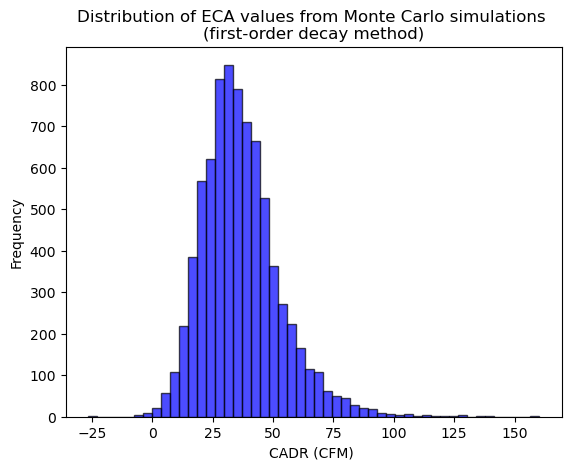

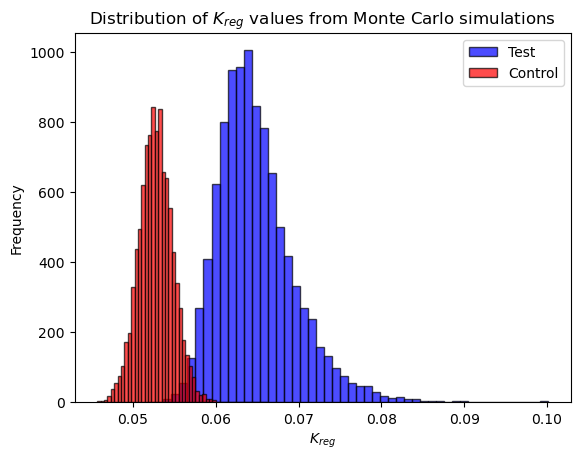

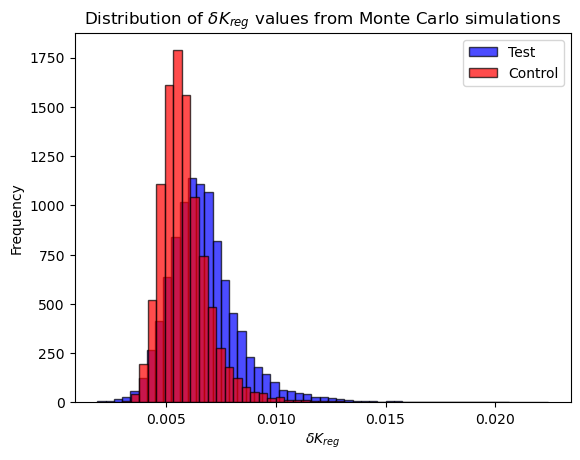

Mean K_reg value for test from Monte Carlo simulations = 0.0646 1/time (1/min by default)

Standard deviation of K_reg value for test from Monte Carlo simulations = 0.0035 1/time (1/min by default)

Mean K_reg value for control from Monte Carlo simulations = 0.0527 1/time (1/min by default)

Standard deviation of K_reg value for control from Monte Carlo simulations = 0.0016 1/time (1/min by default)

Mean δK_reg value for test from Monte Carlo simulations = 0.0066 1/time (1/min by default)

Standard deviation of δK_reg value for test from Monte Carlo simulations = 0.0011 1/time (1/min by default)

Mean δK_reg value for control from Monte Carlo simulations = 0.0058 1/time (1/min by default)

Standard deviation of δK_reg value for control from Monte Carlo simulations = 0.0008 1/time (1/min by default)



Nominal CADR = 34.24 CFM

Mean CADR value from Monte Carlo simulations = 35.68 CFM

Overall uncertainty for log-linear CADR: 41.56 CFM

Overall error for kt: 0.0112 1/time (1/min by defa

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

num_simulations = 10000                                                         # Number of MC simulation iterations

################# Loss rate calculator function (Equation 1) ###################

def Loss_Rate(t, c, c_bg):

    ln_c_ratio = -np.log((c-c_bg) / (c[0]-c_bg))
    numerator = np.sum((t * ln_c_ratio) )
    denominator = np.sum((t ** 2) )

    return (numerator / denominator)

################################### Nominal CADR ###############################
'''
Definition: The nominal CADR is the CADR calculated directly using provided mean concentration values
from experiment, not from MC simulations
'''
Nominal_CADR = V * (Loss_Rate(t_test, c_test, c_bg_test) - Loss_Rate(t_control, c_control, c_bg_control))


######################### Monte Carlo simulations ##############################

CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):
    c_test_simulated = np.random.normal((c_test), (sigma_test))
    c_control_simulated = np.random.normal((c_control),(sigma_control))

    CADR_values[i] = V * (Loss_Rate(t_test, c_test_simulated, c_bg_test) -
                          Loss_Rate(t_control, c_control_simulated, c_bg_control))

# Calculate mean and standard deviation of CADR

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

'''
Notice: if output distribution is not normal, one can eleminate n% percentile of
data from output distribution. One can readily detect non-normal distribution by
either comparing nominal CADR to MC CADR, or by visual inspection of the output plot.
By eleminating n% of the data from both sided, the MC CADR will gradually
converge to the nominal distribution. By default, this code excludes the top and bottom 5% 
of the output distributions to exclude implausible long tails on either end (i.e., 10% total).
'''

n=10 #percentile
CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, n/2)) & (CADR_values < np.percentile(CADR_values, 100-(n/2)))])
CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, n/2)) & (CADR_values < np.percentile(CADR_values, 100-(n/2)))])


################################### Plotting ###################################
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of ECA values from Monte Carlo simulations \n(first-order decay method)')
plt.xlabel('CADR (CFM) ')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()


###########################  Loss Rate Calculation  ############################
# Calculates loss rate using Eq(3)
def K_reg(t, c, c_bg):
    ln_c_ratio = -np.log((c - c_bg) / (c[0] - c_bg))
    numerator = np.sum(t * ln_c_ratio)
    denominator = np.sum(t ** 2)
    #print(numerator / denominator)
    return numerator / denominator


##############################  Regression Error  ##############################
# Calculates regression error using Eq(5)
def delta_K_reg(t, c, k, c_bg):
    ln_c_ratio = -np.log((c - c_bg) / (c[0] - c_bg))
    residual_sum = np.sum(((ln_c_ratio - k * t)) ** 2)
    return np.sqrt(residual_sum / ((len(t) - 1) * np.sum(t ** 2)))

# Initialize result arrays
K_reg_test = []
K_reg_control = []
delta_k_reg_test = []
delta_k_reg_control = []

# Monte Carlo simulations for K_reg

i = 0
while i < num_simulations:
    c_test_sim = np.random.normal(c_test, sigma_test)
    c_control_sim = np.random.normal(c_control, sigma_control)

    if np.any((c_test_sim - c_bg_test) <= 0) or (c_test_sim[0] - c_bg_test) <= 0:
        continue
    if np.any((c_control_sim - c_bg_control) <= 0) or (c_control_sim[0] - c_bg_control) <= 0:
        continue

    try:
        K_reg_test.append(K_reg(t_test, c_test_sim, c_bg_test))
        K_reg_control.append(K_reg(t_control, c_control_sim, c_bg_control))
        i += 1
    except:
        continue  # Skip samples that are not a numnumberner (NAN)

# Monte Carlo simulations for delta_K_reg
i = 0
while i < num_simulations:
    c_test_sim = np.random.normal(c_test, sigma_test)
    c_control_sim = np.random.normal(c_control, sigma_control)

    if np.any((c_test_sim - c_bg_test) <= 0) or (c_test_sim[0] - c_bg_test) <= 0:
        continue
    if np.any((c_control_sim - c_bg_control) <= 0) or (c_control_sim[0] - c_bg_control) <= 0:
        continue

    try:
        k_test = K_reg(t_test, c_test_sim, c_bg_test)
        k_control = K_reg(t_control, c_control_sim, c_bg_control)
        delta_k_reg_test.append(delta_K_reg(t_test, c_test_sim, k_test, c_bg_test))
        delta_k_reg_control.append(delta_K_reg(t_control, c_control_sim, k_control, c_bg_control))
        i += 1
    except:
        continue  # Skip bad samples

# Convert to numpy arrays
K_reg_test = np.array(K_reg_test)
K_reg_control = np.array(K_reg_control)
delta_k_reg_test = np.array(delta_k_reg_test)
delta_k_reg_control = np.array(delta_k_reg_control)

'''
Notice: if output distribution is not normal, one can eleminate n% percentile of
data from output distribution. One can readily detect non-normal distribution by
either comparing nominal CADR to MC CADR, or by visual inspection of the output plot.
By eleminating n% of the data from both sided, the MC CADR will gradually
converge to the nominal distribution. By default, this code excludes the top and bottom 5% 
of the output distributions to exclude implausible long tails on either end (i.e., 10% total).
'''

n=10 #percentile (%)

if np.all(sigma_test == 0) and np.all(sigma_control == 0):

  K_reg_mean_test = np.mean(K_reg_test)
  K_reg_std_test = np.std(K_reg_test)
  K_reg_mean_control = np.mean(K_reg_control)
  K_reg_std_control = np.std(K_reg_control)

  delta_k_reg_mean_test = np.mean(delta_k_reg_test)
  delta_k_reg_std_test = np.std(delta_k_reg_test)
  delta_k_reg_mean_control = np.mean(delta_k_reg_control)
  delta_k_reg_std_control = np.std(delta_k_reg_control)
else:

    K_reg_mean_test = np.mean(K_reg_test[(K_reg_test > np.percentile(K_reg_test, n/2)) & (K_reg_test < np.percentile(K_reg_test, 100-(n/2)))])
    K_reg_std_test = np.std(K_reg_test[(K_reg_test > np.percentile(K_reg_test, n/2)) & (K_reg_test < np.percentile(K_reg_test, 100-(n/2)))])
    K_reg_mean_control = np.mean(K_reg_control[(K_reg_control > np.percentile(K_reg_control, n/2)) & (K_reg_control < np.percentile(K_reg_control, 100-(n/2)))])
    K_reg_std_control = np.std(K_reg_control[(K_reg_control > np.percentile(K_reg_control, n/2)) & (K_reg_control < np.percentile(K_reg_control, 100-(n/2)))])

    delta_k_reg_mean_test = np.mean(delta_k_reg_test[(delta_k_reg_test > np.percentile(delta_k_reg_test, n/2)) & (delta_k_reg_test < np.percentile(delta_k_reg_test, 100-(n/2)))])
    delta_k_reg_std_test = np.std(delta_k_reg_test[(delta_k_reg_test > np.percentile(delta_k_reg_test, n/2)) & (delta_k_reg_test < np.percentile(delta_k_reg_test, 100-(n/2)))])
    delta_k_reg_mean_control = np.mean(delta_k_reg_control[(delta_k_reg_control > np.percentile(delta_k_reg_control, n/2)) & (delta_k_reg_control < np.percentile(delta_k_reg_control, 100-(n/2)))])
    delta_k_reg_std_control = np.std(delta_k_reg_control[(delta_k_reg_control > np.percentile(delta_k_reg_control, n/2)) & (delta_k_reg_control < np.percentile(delta_k_reg_control, 100-(n/2)))])

# Plotting the distribution of k1 values
plt.hist(K_reg_test, bins=50, alpha=0.7, color='b', edgecolor='black', label='k1 Test')
plt.hist(K_reg_control, bins=50, alpha=0.7, color='r', edgecolor='black', label='k1 Control')
plt.title('Distribution of $K_{reg}$ values from Monte Carlo simulations')
plt.xlabel('$K_{reg}$')
plt.ylabel('Frequency')
plt.legend(['Test', 'Control'])
plt.show()

# Plotting the distribution of k2 values
plt.hist(delta_k_reg_test, bins=50, alpha=0.7, color='b', edgecolor='black', label='k2 Test')
plt.hist(delta_k_reg_control, bins=50, alpha=0.7, color='r', edgecolor='black', label='k2 Control')
plt.title('Distribution of $\delta K_{reg}$ values from Monte Carlo simulations')
plt.xlabel('$\delta K_{reg}$')
plt.ylabel('Frequency')
plt.legend(['Test', 'Control'])
plt.show()

# Output results
print(f"Mean K_reg value for test from Monte Carlo simulations = {K_reg_mean_test:.4f}","1/time (1/min by default)\n")

print(f"Standard deviation of K_reg value for test from Monte Carlo simulations = {K_reg_std_test:.4f}","1/time (1/min by default)\n")
print(f"Mean K_reg value for control from Monte Carlo simulations = {K_reg_mean_control:.4f}","1/time (1/min by default)\n")
print(f"Standard deviation of K_reg value for control from Monte Carlo simulations = {K_reg_std_control:.4f}","1/time (1/min by default)\n")

print(f"Mean δK_reg value for test from Monte Carlo simulations = {delta_k_reg_mean_test:.4f}","1/time (1/min by default)\n")
print(f"Standard deviation of δK_reg value for test from Monte Carlo simulations = {delta_k_reg_std_test:.4f}","1/time (1/min by default)\n")
print(f"Mean δK_reg value for control from Monte Carlo simulations = {delta_k_reg_mean_control:.4f}","1/time (1/min by default)\n")
print(f"Standard deviation of δK_reg value for control from Monte Carlo simulations = {delta_k_reg_std_control:.4f}","1/time (1/min by default)\n")

overall_error_kt = K_reg_std_test + delta_k_reg_mean_test + delta_k_reg_std_test
overall_error_kc = K_reg_std_control + delta_k_reg_mean_control + delta_k_reg_std_control
overall_uncertainty_CADR_LL = V * np.sqrt(overall_error_kt**2 + overall_error_kc**2)

print("\n")

print(f"Nominal CADR = {Nominal_CADR:.2f}","CFM\n")
print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean:.2f}","CFM\n")
print(f"Overall uncertainty for log-linear CADR: {overall_uncertainty_CADR_LL:.2f}","CFM\n")

print(f"Overall error for kt: {overall_error_kt:.4f}","1/time (1/min by default)\n")
print(f"Overall error for kc: {overall_error_kc:.4f}","1/time (1/min by default)\n")



## 2. Integral approach





# CADR Formula

The CADR based on the integral method is given by:

$$
\text{CADR}_{\text{Integral}} = 
\frac{V(C_{\text{test}}(0)-C_{\text{last}})}
     {\int_{0}^{t_{\text{last}}} (C_{\text{test}}(t)-C_{bg, \text{test}}) \, dt}
- 
\frac{V(C_{\text{control}}(0)-C_{\text{last}})}
     {\int_{0}^{t_{\text{last}}} (C_{\text{control}}(t)-C_{bg, \text{control}}) \, dt}
\tag{11}
$$

Where the integral in the denominator can be calculated using either the **trapezoidal** or **logarithmic trapezoidal** method. Here, we use the **logarithmic trapezoidal** method, given by:

$$
\int_{0}^{t_{\text{last}}} C(t) \, dt =
\sum_{n=1}^{t_{\text{last}}} 
\left( 
\frac{t_i - t_{i-1}}{\ln\left( \frac{C(t_{i-1}) - C_{bg}}{C(t_i) - C_{bg}} \right)} 
\left( C(t_{i-1}) - C(t_i) \right) 
\right)
\tag{12}
$$


# **Execute the cells below to perform log-linear regression calculations**

### 2.1. Log-Trapezoidal Method

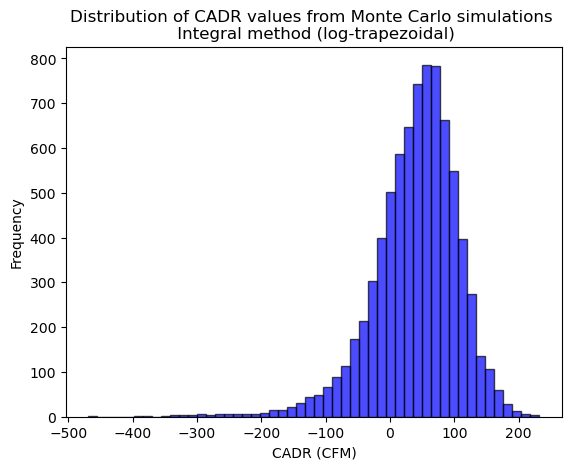

Control loss rate = 0.0954 1/time (1/min by default)

Test loss rate = 0.1118 1/time (1/min by default)

Nominal CADR value (CFM) = 49.39 CFM

Mean CADR value from Monte Carlo simulations = 43.30 CFM

Standard deviation of CADR value from Monte Carlo simulations = 47.41 CFM

Percent error in CADR = 109.5 %



In [9]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

num_simulations = 10000

################## Log-Trapezoidal method (Equation 12) #########################

def compute_integral(t, c, c_bg):
    N = len(t)
    integral_sum = 0.0

    for i in range(1, N):

        t_diff = t[i] - t[i-1]
        ln_c_ratio = np.log((c[i-1]-c_bg) / (c[i]-c_bg))
        #print(ln_c_ratio)
        c_diff = c[i-1] - c[i]
        integral_sum += (t_diff / ln_c_ratio) * c_diff

    return integral_sum

########Function to compute the CADR component for either test or control#######
def Loss_Rate(t, c, c_bg):

    integral_c = compute_integral(t, c, c_bg)
    #print(integral_c)
    return (c[0]-c[-1]) / integral_c


# The following line calculates the CADR without considering errors, using only the provided central velues
test_loss = Loss_Rate(t_test, c_test, c_bg_test)
control_loss = Loss_Rate(t_control, c_control, c_bg_control)
CADR_nominal = V* (Loss_Rate(t_test, c_test, c_bg_test) - Loss_Rate(t_control, c_control, c_bg_control))

############################# Monte Carlo simulations###########################
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):

    c_test_simulated = np.random.normal(c_test, sigma_test)
    c_control_simulated = np.random.normal(c_control, sigma_control)
    CADR_values[i] = V * (Loss_Rate(t_test, c_test_simulated, c_bg_test) - Loss_Rate(t_control, c_control_simulated, c_bg_control))

############## Calculate mean and standard deviation of MC CADR ################

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

'''
Notice: if output distribution is not normal, one can eleminate n% percentile of
data from output distribution. One can readily detect non-normal distribution by
either comparing nominal CADR to MC CADR, or by visual inspection of the output plot.
By eleminating n% of the data from both sided, the MC CADR will gradually
converge to the nominal distribution. By default, this code excludes the top and bottom 5% 
of the output distributions to exclude implausible long tails on either end (i.e., 10% total).
'''

n=10 #percentile
CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, n/2)) & (CADR_values < np.percentile(CADR_values, 100-(n/2)))])
CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, n/2)) & (CADR_values < np.percentile(CADR_values, 100-(n/2)))])
cadr_percent_error = CADR_std / CADR_mean * 100

# Plotting the distribution of CADR values
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n Integral method (log-trapezoidal)')
plt.xlabel('CADR (CFM)')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

print(f"Control loss rate = {control_loss:.4f}","1/time (1/min by default)\n")
print(f"Test loss rate = {test_loss:.4f}","1/time (1/min by default)\n")
print(f"Nominal CADR value (CFM) = {CADR_nominal:.2f}","CFM\n")

print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean:.2f}","CFM\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std:.2f}","CFM\n")
print(f"Percent error in CADR = {cadr_percent_error:.1f}","%\n")



### 2.2. Trapezoidal Method (usually not needed)

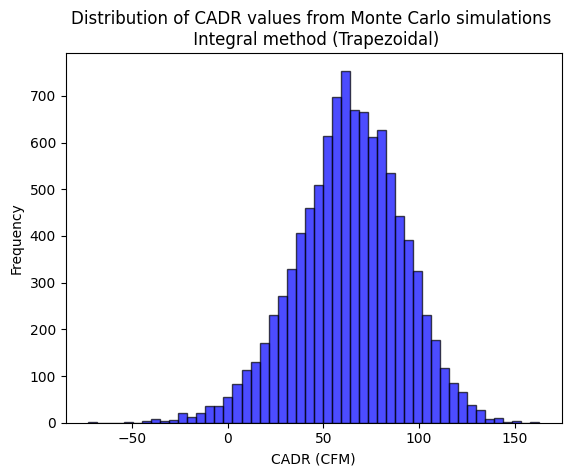

Control loss rate = 0.0801 1/time (1/min by default)

Test loss rate = 0.1018 1/time (1/min by default)

Nominal CADR value (CFM) = 65.14 CFM

Mean CADR value from Monte Carlo simulations = 63.76 CFM

Standard deviation of CADR value from Monte Carlo simulations = 21.61 CFM

Percent error in CADR = 33.9 %



In [230]:
import numpy as np
import matplotlib.pyplot as plt


num_simulations = 10000

################################ Trapezoidal method ############################
def compute_integral(t, c, c_bg):
    N = len(t)
    integral_sum = 0.0

    for i in range(1, N):

        t_diff = t[i] - t[i-1]
        c_sum = c[i-1] + c[i]
        integral_sum += (t_diff * c_sum) / 2

    return integral_sum

########Function to compute the CADR component for either test or control#######
def Loss_Rate(t, c, c_bg):

    integral_c = compute_integral(t, c, c_bg)
    #print(integral_c)
    return (c[0]-c[-1]) / integral_c


# The following line calculates the CADR without considering errors, using only the provided central velues
test_loss = Loss_Rate(t_test, c_test, c_bg_test)
control_loss = Loss_Rate(t_control, c_control, c_bg_control)
CADR_nominal = V* (Loss_Rate(t_test, c_test, c_bg_test) - Loss_Rate(t_control, c_control, c_bg_control))


############################# Monte Carlo simulations###########################
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):

    c_test_simulated = np.random.normal(c_test, sigma_test)
    c_control_simulated = np.random.normal(c_control, sigma_control)
    CADR_values[i] = V * (Loss_Rate(t_test, c_test_simulated, c_bg_test) - Loss_Rate(t_control, c_control_simulated, c_bg_control))

############## Calculate mean and standard deviation of MC CADR ################

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

'''
Notice: if output distribution is not normal, one can eleminate n% percentile of
data from output distribution. One can readily detect non-normal distribution by
either comparing nominal CADR to MC CADR, or by visual inspection of the output plot.
By eleminating n% of the data from both sided, the MC CADR will gradually
converge to the nominal distribution. By default, this code excludes the top and bottom 5% 
of the output distributions to exclude implausible long tails on either end (i.e., 10% total).
'''

n=10 #percentile
CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, n/2)) & (CADR_values < np.percentile(CADR_values, 100-(n/2)))])
CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, n/2)) & (CADR_values < np.percentile(CADR_values, 100-(n/2)))])
cadr_percent_error = CADR_std / CADR_mean * 100

# Plotting the distribution of CADR values
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n Integral method (Trapezoidal)')
plt.xlabel('CADR (CFM)')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()


print(f"Control loss rate = {control_loss:.4f}","1/time (1/min by default)\n")
print(f"Test loss rate = {test_loss:.4f}","1/time (1/min by default)\n")
print(f"Nominal CADR value (CFM) = {CADR_nominal:.2f}","CFM\n")

print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean:.2f}","CFM\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std:.2f}","CFM\n")
print(f"Percent error in CADR = {cadr_percent_error:.1f}","%\n")
